## Figures of paper:
"Towards understanding epoch-wise double descent in two-layer linear neural networks".

In [1]:
import os
from pathlib import Path
import numpy as np

import matplotlib as mpl
from cycler import cycler
from matplotlib import pyplot as plt

## Functions

In [2]:
# Dynamics

def z_solution(z0, t, c, r, s, l):
    
    K = np.sqrt(c**2 * l**2 + 4 * r**2 * s**2)
    f_0 = (c**2 * l + 4 * r**2 * s * z0 + K * np.sqrt(c**2 + 4 * r**2 * z0**2)) / (l * (s - l * z0))
    
    
    n = f_0**2 * l**2 * s * np.exp(2 * K * t) - 2 * f_0 * c**2 * l**2 * np.exp(K * t) - 4 * c**2 * r**2 * s 
    d = l * (f_0**2 * l**2 * np.exp(2 * K * t) + 8 * f_0 * r**2 * s * np.exp(K * t) - 4 * c**2 * r**2)
    
    return n / d

In [3]:
# MSE functions

def z_true(s, l, q):
    return (1 - q) * s / l


def mse_true(s, l, q, z):
    return (z_true(s, l, q) - z)**2

# Changing $\lambda_i$

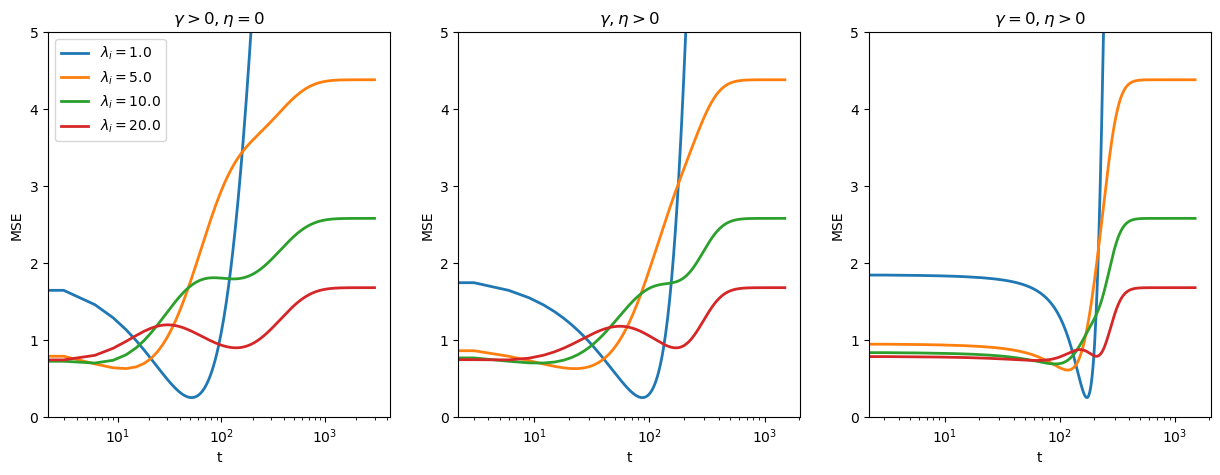

In [4]:
mpl.rcParams['lines.linewidth'] = 2

# Set hyperparameters
tau = 1500
res = 501

# We run the one-layer model a bit longer
tau_l = 3000
res_l = 1001

z0 = 0.01
q1 = 0.5
q2 = 0.8
s = 2.5
l1 = 1.0
p = 1
d = 10

ls = np.array([1.0, 5.0, 10.0, 20.0]).reshape(-1, 1) # Values of lambda

tot_rate = 0.005
cs = [tot_rate, tot_rate/2, 0.0]
rs = [0.0, tot_rate/2, tot_rate]


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
titles = [fr"$\gamma > 0, \eta = 0$", fr"$\gamma, \eta > 0$", fr"$\gamma = 0, \eta > 0$"]

# Find solutions and calculate MSE
for i, (c, r) in enumerate(zip(cs, rs)):
    
    if i == 0:
        ts = np.linspace(0, tau_l, res_l)
    else:
        ts = np.linspace(0, tau, res)
    
    z_sol_1 = z_solution(z0, ts, c, r, s, l1)
    z_sol_2 = z_solution(z0, ts, c, r, s, ls)
    
    mse_sol_1 = p * l1 * mse_true(s, l1, q1, z_sol_1)
    mse_sol_2 = (d - p) * ls * mse_true(s, ls, q2, z_sol_2)
    mse_sol = 0.5 * (mse_sol_1 + mse_sol_2)
    
    ax[i].set_xlabel("t")
    ax[i].set_ylabel("MSE")
    ax[i].set_xscale("log")
    
    ax[i].set_title(titles[i])
    ax[i].plot(ts, mse_sol.T, label=[fr"$\lambda_i=${round(l, 5)}" for l in ls.reshape(-1)])
    
    if i == 0:
        ax[i].legend(loc=2)
    
    ax[i].set_ylim([0, 5])

plt.show()

## Changing $\sigma_i$

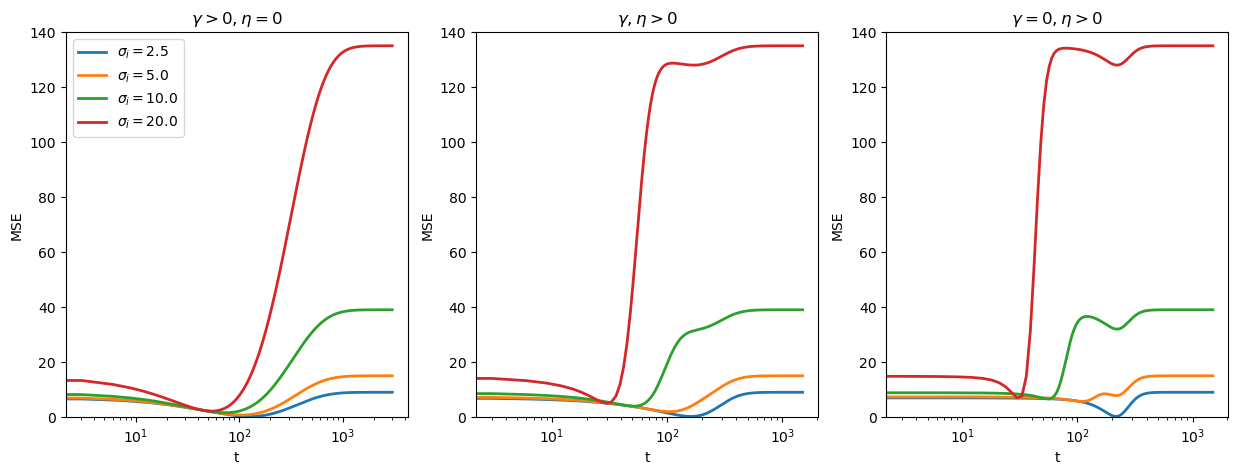

In [5]:
# Set hyperparameters
tau = 1500
res = 501
ts = np.linspace(0, tau, res)

# We run the one-layer model a bit longer
tau_l = 3000
res_l = 1001

z0 = 0.01
q1 = 0.5
q2 = 0.8
s1 = 2.5
l = 1.0
p = 9
d = 10

ss = np.array([2.5, 5.0, 10.0, 20.0]).reshape(-1, 1) # Values of sigma

tot_rate = 0.005
cs = [tot_rate, tot_rate/2, 0.0]
rs = [0.0, tot_rate/2, tot_rate]


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
titles = [fr"$\gamma > 0, \eta = 0$", fr"$\gamma, \eta > 0$", fr"$\gamma = 0, \eta > 0$"]

# Find solutions and calculate MSE
for i, (c, r) in enumerate(zip(cs, rs)):
    
    if i == 0:
        ts = np.linspace(0, tau_l, res_l)
    else:
        ts = np.linspace(0, tau, res)
    
    z_sol_1 = z_solution(z0, ts, c, r, s1, l)
    z_sol_2 = z_solution(z0, ts, c, r, ss, l)
    
    mse_sol_1 = p * l * mse_true(s1, l, q1, z_sol_1)
    mse_sol_2 = (d - p) * l * mse_true(ss, l, q2, z_sol_2)
    mse_sol = 0.5 * (mse_sol_1 + mse_sol_2)
    
    ax[i].set_xlabel("t")
    ax[i].set_ylabel("MSE")
    ax[i].set_xscale("log")
    
    ax[i].set_title(titles[i])
    ax[i].plot(ts, mse_sol.T, label=[fr"${{\sigma_i}}=${round(s, 5)}" for s in ss.reshape(-1)])
    
    if i == 0:
        ax[i].legend(loc=2)
    
    ax[i].set_ylim([0, 140])
    
plt.show()